# Notebook showcasing Electric Load Forecasting 

In [7]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import sklearn 
import statsmodels

import datetime

#### step 1 : Import data 


In [65]:
electricData=pd.read_csv('ElectricLoad.csv')

In [66]:
electricData.head()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,Date.1
0,2010,1,1,6,1,2477,1.52512,47,1/1/10
1,2010,1,1,6,2,2430,1.44281,48,1/1/10
2,2010,1,1,6,3,2409,1.36794,45,1/1/10
3,2010,1,1,6,4,2384,1.36829,45,1/1/10
4,2010,1,1,6,5,2407,1.49842,45,1/1/10


In [71]:
electricData=electricData.dropna()

In [74]:

electricData=electricData.drop('Date.1',1)


In [75]:
electricData.head()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp
0,2010,1,1,6,1,2477,1.52512,47
1,2010,1,1,6,2,2430,1.44281,48
2,2010,1,1,6,3,2409,1.36794,45
3,2010,1,1,6,4,2384,1.36829,45
4,2010,1,1,6,5,2407,1.49842,45


In [82]:
electricData['Day'].describe()

count    8760.000000
mean        4.005479
std         2.000107
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: Day, dtype: float64

In [84]:
electricData['DateTime']=pd.to_datetime(electricData.YR*10000+electricData.MO*100+electricData.Date,format='%Y%m%d')

In [85]:
electricData.head()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime
0,2010,1,1,6,1,2477,1.52512,47,2010-01-01
1,2010,1,1,6,2,2430,1.44281,48,2010-01-01
2,2010,1,1,6,3,2409,1.36794,45,2010-01-01
3,2010,1,1,6,4,2384,1.36829,45,2010-01-01
4,2010,1,1,6,5,2407,1.49842,45,2010-01-01


In [86]:
electricData['DayofWeek']=electricData['DateTime'].dt.dayofweek

In [87]:
electricData.head()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime,DayofWeek
0,2010,1,1,6,1,2477,1.52512,47,2010-01-01,4
1,2010,1,1,6,2,2430,1.44281,48,2010-01-01,4
2,2010,1,1,6,3,2409,1.36794,45,2010-01-01,4
3,2010,1,1,6,4,2384,1.36829,45,2010-01-01,4
4,2010,1,1,6,5,2407,1.49842,45,2010-01-01,4


In [89]:
electricData['DayofWeek'].describe()

count    8760.000000
mean        3.002740
std         1.998056
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: DayofWeek, dtype: float64

In [90]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

electricData['DayName']=electricData['DayofWeek'].apply(lambda x :days[x])

In [91]:
electricData.head()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime,DayofWeek,DayName
0,2010,1,1,6,1,2477,1.52512,47,2010-01-01,4,Fri
1,2010,1,1,6,2,2430,1.44281,48,2010-01-01,4,Fri
2,2010,1,1,6,3,2409,1.36794,45,2010-01-01,4,Fri
3,2010,1,1,6,4,2384,1.36829,45,2010-01-01,4,Fri
4,2010,1,1,6,5,2407,1.49842,45,2010-01-01,4,Fri


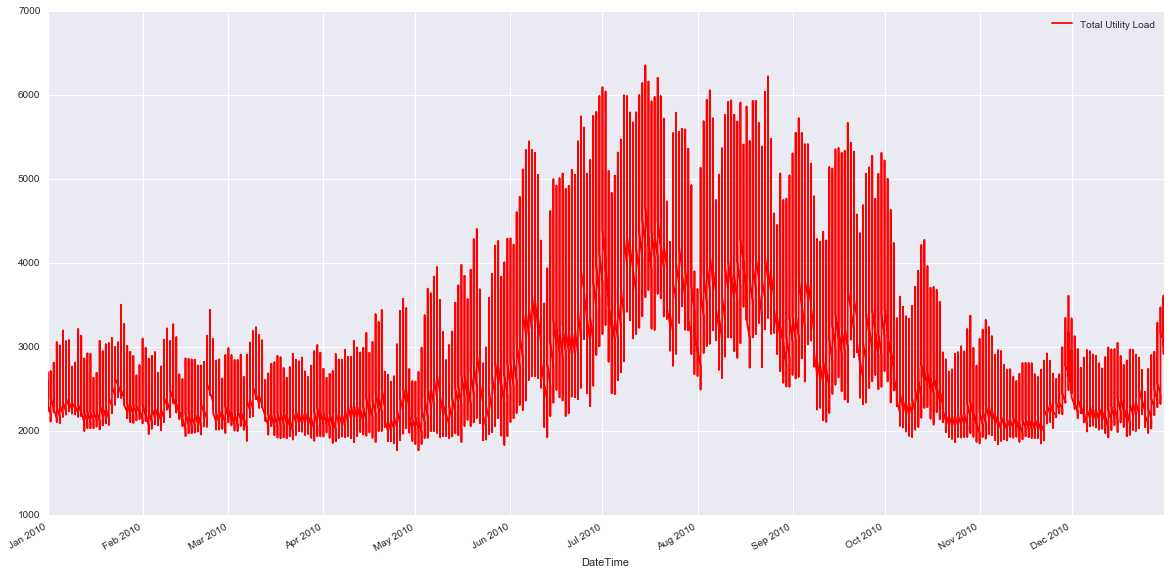

In [110]:
electricData.plot(x='DateTime',y='Total Utility Load',style='-',figsize=(20,10),color='red')

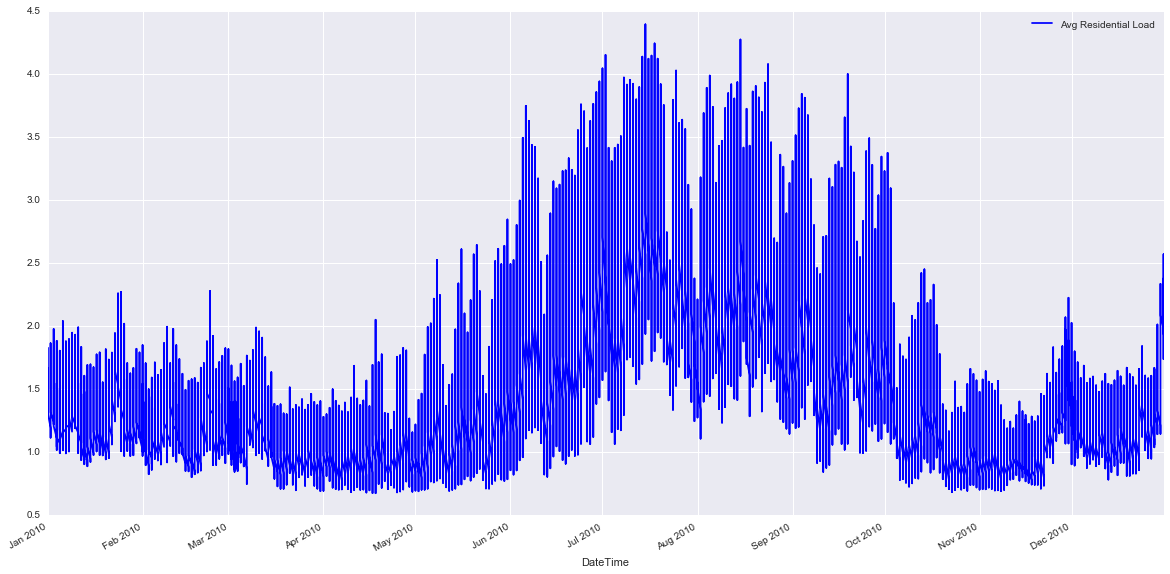

In [113]:
electricData.plot(x='DateTime',y='Avg Residential Load',style='-',figsize=(20,10),color='blue')

##### The above graphs indicate a seasonality pattern on the peak loads of the utility in Phoenix , AZ.
1. Summer Loads - Jun 2010 - Sep 2010
2. Peak Load Months - July and Aug 2010


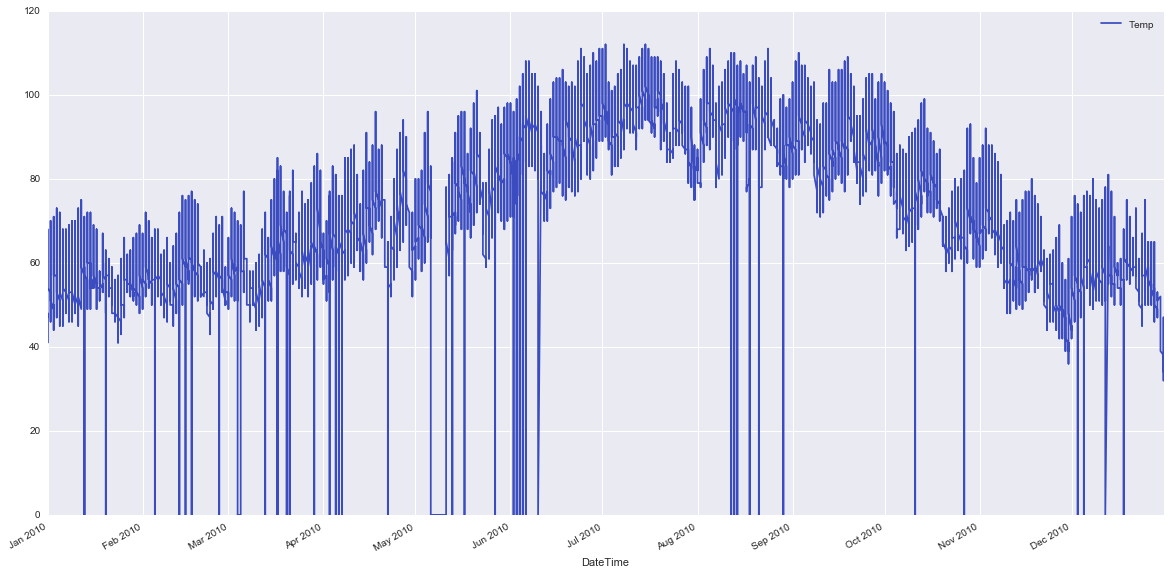

In [124]:
electricData.plot(x='DateTime',y='Temp',style='-',figsize=(20,10),colormap='coolwarm')

In [116]:
electricData.query('Temp==0')

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime,DayofWeek,DayName
293,2010,1,13,4,6,2367,1.26023,0,2010-01-13,2,Weds
298,2010,1,13,4,11,2660,1.30374,0,2010-01-13,2,Weds
468,2010,1,20,4,13,2544,1.12931,0,2010-01-20,2,Weds
846,2010,2,5,6,7,2842,1.60314,0,2010-02-05,4,Fri
1040,2010,2,13,7,9,2672,1.72662,0,2010-02-13,5,Sat
1082,2010,2,15,2,3,1941,0.84908,0,2010-02-15,0,Mon
1134,2010,2,17,4,7,2722,1.44072,0,2010-02-17,2,Weds
1135,2010,2,17,4,8,2784,1.57624,0,2010-02-17,2,Weds
1136,2010,2,17,4,9,2646,1.32458,0,2010-02-17,2,Weds
1346,2010,2,26,6,3,2017,0.97596,0,2010-02-26,4,Fri


In [126]:
electricData['Temp'][294]


56.0

In [131]:
electricData.loc[(293),:]

YR                                     2010
MO                                        1
Date                                     13
Day                                       4
Hour                                      6
Total Utility Load                     2367
Avg Residential Load                1.26023
Temp                                      0
DateTime                2010-01-13 00:00:00
DayofWeek                                 2
DayName                                Weds
Name: 293, dtype: object

In [132]:
temp0Index=electricData[electricData['Temp']==0].index.tolist()

In [134]:
len(temp0Index)

237

In [138]:
electricData=electricData.drop(293,axis=1)

In [141]:
electricData.tail()

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime,DayofWeek,DayName
8755,2010,12,31,6,20,3560,2.27434,41,2010-12-31,4,Fri
8756,2010,12,31,6,21,3503,2.32555,40,2010-12-31,4,Fri
8757,2010,12,31,6,22,3455,2.32634,39,2010-12-31,4,Fri
8758,2010,12,31,6,23,3357,2.24067,38,2010-12-31,4,Fri
8759,2010,12,31,6,24,3295,2.22843,34,2010-12-31,4,Fri


In [140]:
electricData=electricData.drop('Temp',axis=0)

In [148]:
#electricData.set_value(293,'Temp',0.0)
#Updating missing Temp Values 

In [166]:
electricData.loc[(1039),:]

YR                                     2010
MO                                        2
Date                                     13
Day                                       7
Hour                                      8
Total Utility Load                     2619
Avg Residential Load                1.73659
Temp                                     49
DateTime                2010-02-13 00:00:00
DayofWeek                                 5
DayName                                 Sat
Name: 1039, dtype: object

In [160]:
temp0Index[0:5]

[293, 298, 468, 846, 1040]

In [186]:
missingTemp=0
for i in temp0Index:
    lastTemp= electricData['Temp'][i-1]
    if lastTemp==0:
        for x in range(i,0,-1):
            if electricData['Temp'][x]!=0:
                lastTemp= electricData['Temp'][x]
                break
            else:
                continue
    nextTemp=electricData['Temp'][i+1]
    if nextTemp==0:
        for x in range(i,len(electricData),1):
            if electricData['Temp'][x]!=0:
                nextTemp= electricData['Temp'][x]
                break
            else:
                continue
    missingTemp=(lastTemp+nextTemp)/2
    electricData.set_value(i,'Temp',missingTemp)

In [172]:
temo

list

In [183]:
len(electricData)

8760

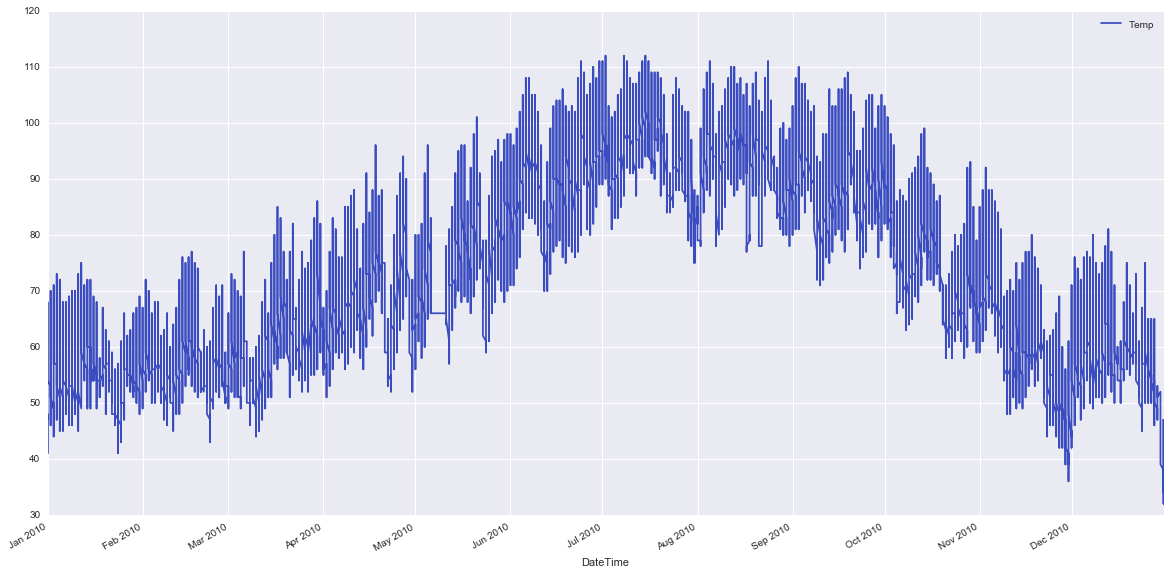

In [192]:
electricData.plot(x='DateTime',y='Temp',style='-',figsize=(20,10),colormap='coolwarm')

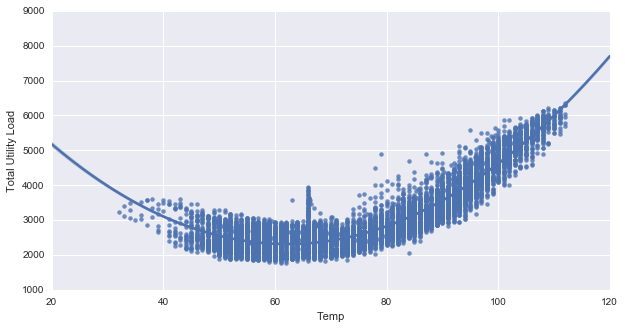

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x='Temp',y='Total Utility Load',data=electricData,order=2)

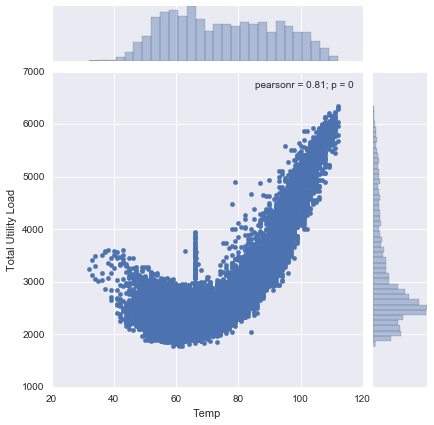

In [198]:
sns.jointplot(x='Temp',y='Total Utility Load',data=electricData)

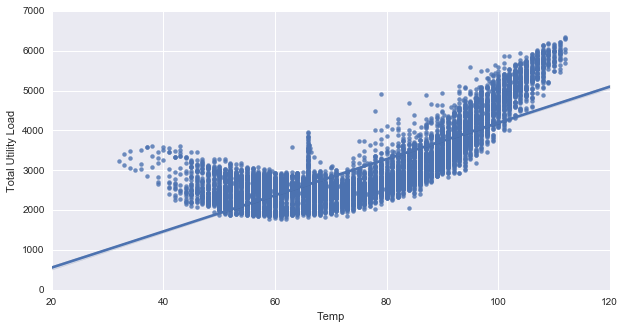

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x='Temp',y='Total Utility Load',data=electricData,order=1)

<function seaborn.utils.despine>

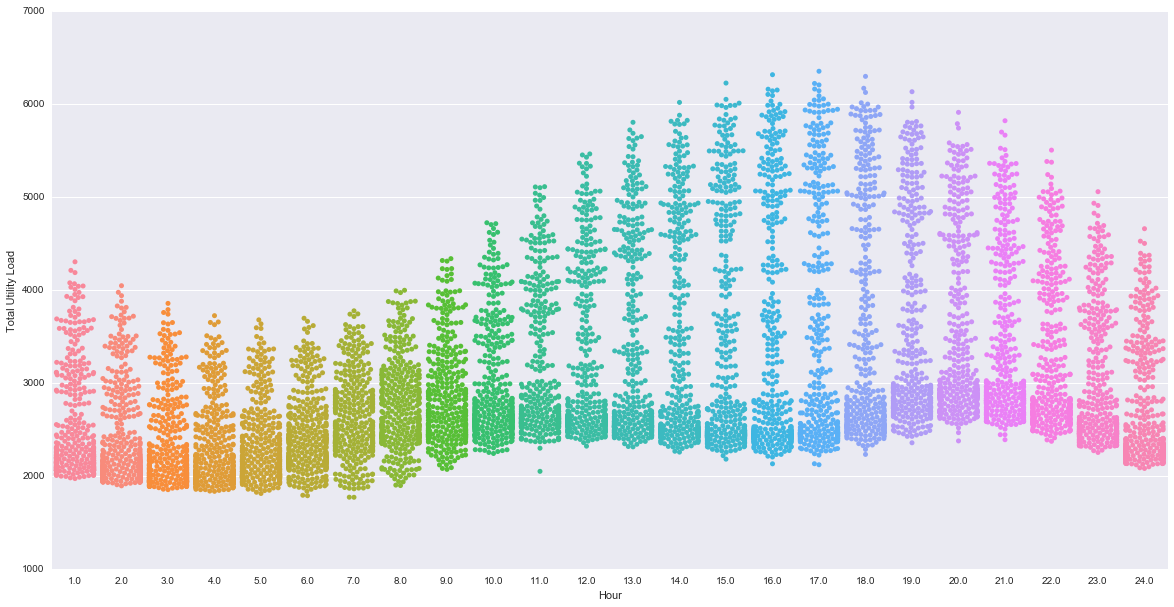

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.swarmplot(x='Hour',y='Total Utility Load',data=electricData,ax=ax)
sns.despine

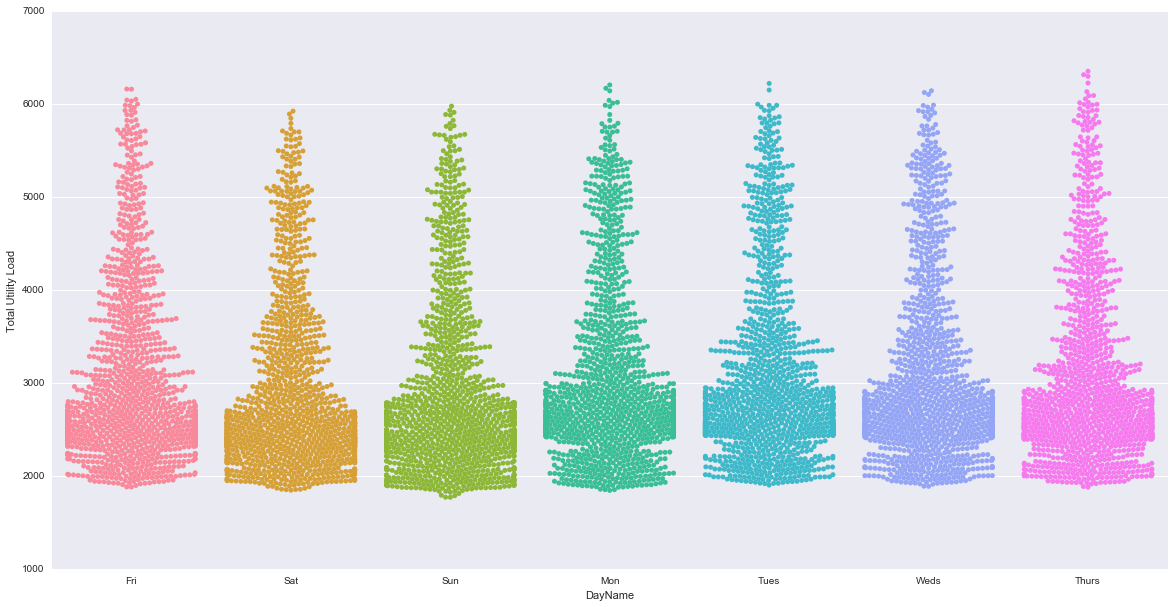

In [213]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.swarmplot(x='DayName',y='Total Utility Load',data=electricData)

In [214]:
electricDataSummer=electricData.query('MO >=6 and MO<=9')

In [220]:
electricDataSummer.tail(10)

,YR,MO,Date,Day,Hour,Total Utility Load,Avg Residential Load,Temp,DateTime,DayofWeek,DayName
6542,2010,9,30,5,15,5088,2.97353,104,2010-09-30,3,Thurs
6543,2010,9,30,5,16,5276,3.13486,105,2010-09-30,3,Thurs
6544,2010,9,30,5,17,5308,3.34314,105,2010-09-30,3,Thurs
6545,2010,9,30,5,18,5141,3.21610,103,2010-09-30,3,Thurs
6546,2010,9,30,5,19,4952,2.97002,102,2010-09-30,3,Thurs
6547,2010,9,30,5,20,4757,2.79508,96,2010-09-30,3,Thurs
6548,2010,9,30,5,21,4532,2.69417,94,2010-09-30,3,Thurs
6549,2010,9,30,5,22,4207,2.47103,93,2010-09-30,3,Thurs
6550,2010,9,30,5,23,3800,2.13651,93,2010-09-30,3,Thurs
6551,2010,9,30,5,24,3387,1.82940,93,2010-09-30,3,Thurs


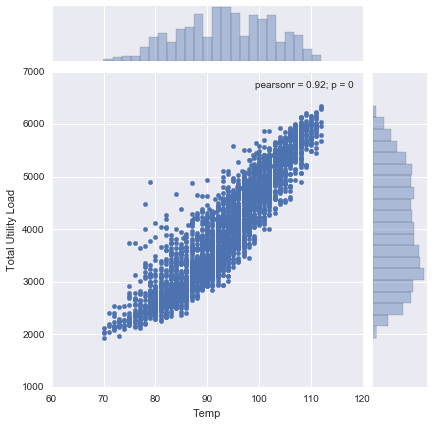

In [216]:
sns.jointplot(x='Temp',y='Total Utility Load',data=electricDataSummer)

In [217]:
electricDataSummer['Temp'].mean()

93.45365864071039

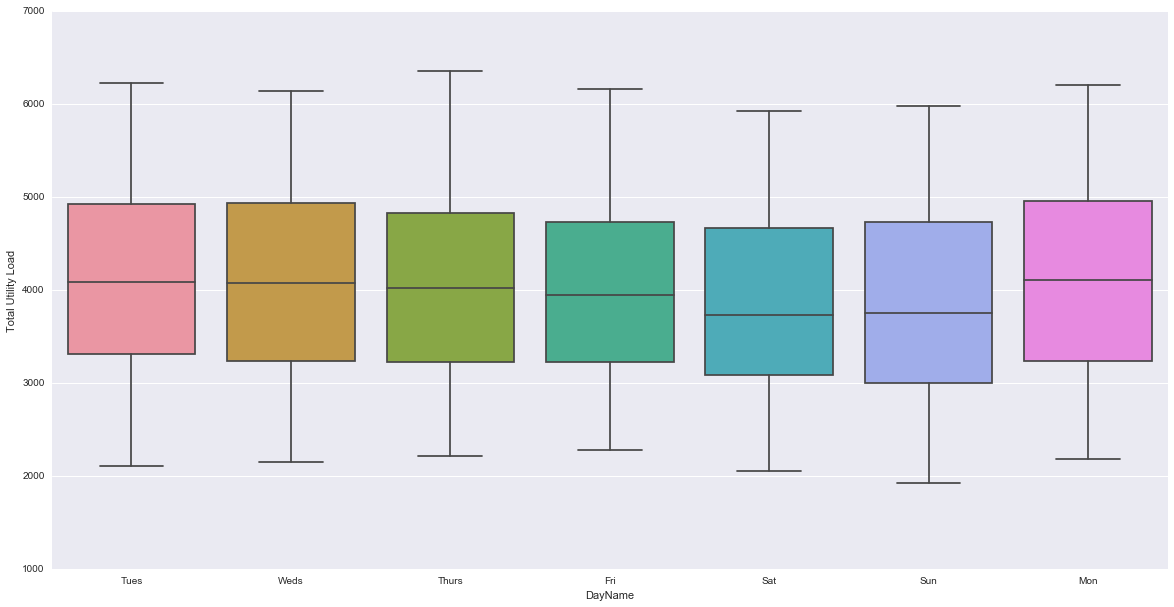

In [222]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.boxplot(x='DayName',y='Total Utility Load',data=electricDataSummer)

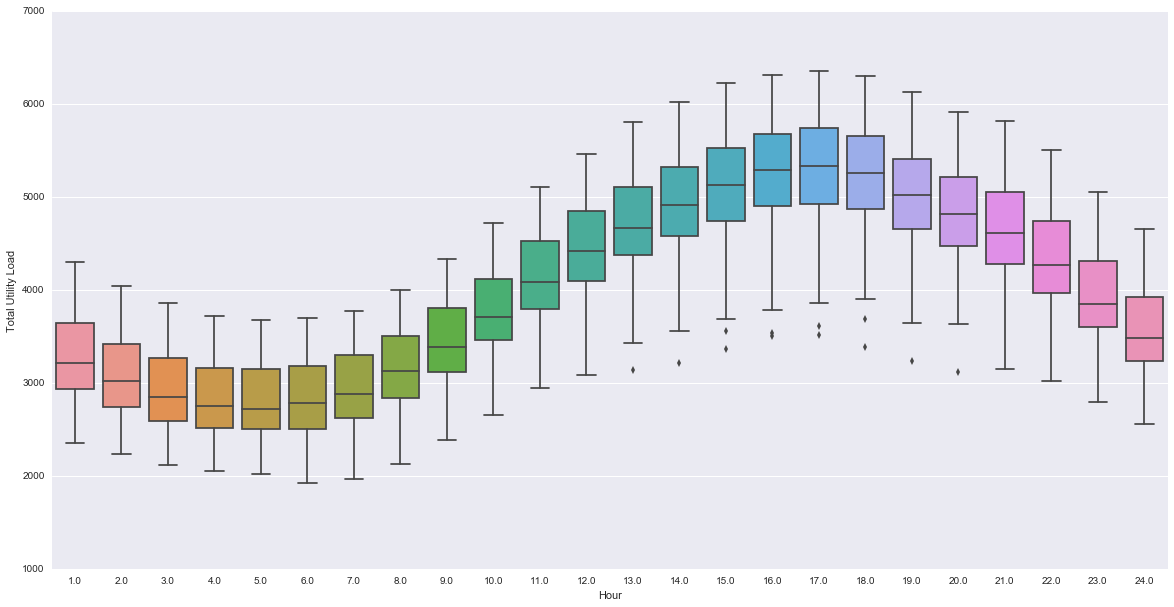

In [224]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.boxplot(x='Hour',y='Total Utility Load',data=electricDataSummer)

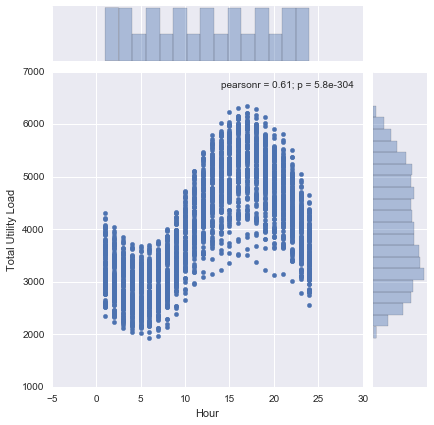

In [225]:
sns.jointplot(x='Hour',y='Total Utility Load',data=electricDataSummer)

From the above charts we conculude that hour of day (categorical/dummy variable) and Temp must be included in the model. However , day of the week doesn't seem to affect the total utility load for residential sector 


### Step 2 : Modeling

#### *Univariate Modeling using 'Temp' as Predictor*

In [226]:
from sklearn.cross_validation import train_test_split

train,test=train_test_split(electricDataSummer,test_size=0.2)

In [237]:
import statsmodels.formula.api as smf

temp_model=smf.ols(formula="train['Total Utility Load']~Temp",data=train)

temp_model_fit=temp_model.fit()

In [238]:
temp_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     train['Total Utility Load']   R-squared:                       0.842
Model:                                     OLS   Adj. R-squared:                  0.842
Method:                          Least Squares   F-statistic:                 1.249e+04
Date:                         Tue, 19 Apr 2016   Prob (F-statistic):               0.00
Time:                                 18:34:07   Log-Likelihood:                -17365.
No. Observations:                         2342   AIC:                         3.473e+04
Df Residuals:                             2340   BIC:                         3.475e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -5806.9121     88.200    -65.838      0.000     -5979.871 -5633.953
Temp         105.0396      0.940    111.769      0.000       103.197   106.883
==============================================================================
Omnibus:                       94.320   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.774
Skew:                           0.396   Prob(JB):                     4.01e-29
Kurtosis:                       3.844   Cond. No.                         997.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
temp_model_fit.params

Intercept   -5806.912102
Temp          105.039629
dtype: float64

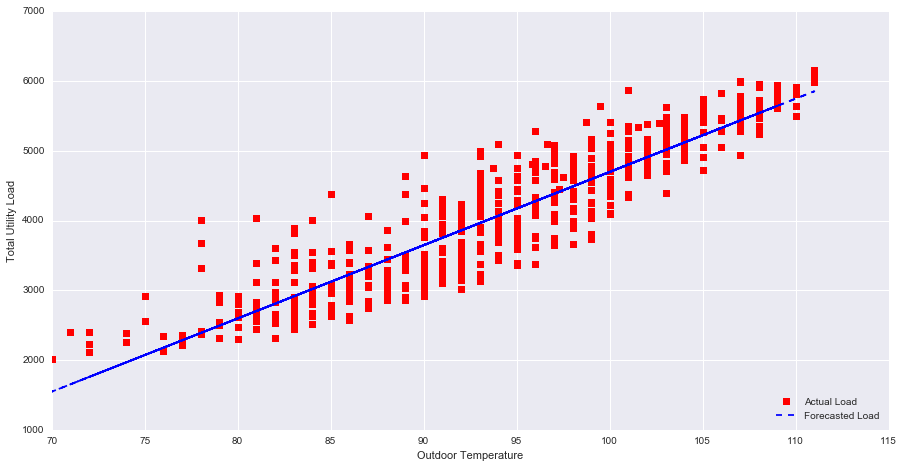

In [282]:
plt.figure(figsize=(15,7.5))
plt.plot(test['Temp'],test['Total Utility Load'],'rs',label='Actual Load')
plt.plot(test['Temp'],temp_model_fit.predict(test),'b--',label='Forecasted Load')
plt.ylabel("Total Utility Load")
plt.xlabel("Outdoor Temperature")
plt.legend(loc=4)

In [259]:
ActualTestLoad=test['Total Utility Load'].as_matrix()

In [260]:
PredictedTestLoad=temp_model_fit.predict(test)

In [264]:
from sklearn.metrics import r2_score

In [265]:
r2_score(ActualTestLoad,PredictedTestLoad)

0.83450501071794092

In [266]:
ActualTrainLoad=train['Total Utility Load'].as_matrix()

In [267]:
PredictedTrainLoad=temp_model_fit.predict(train)

In [268]:
r2_score(ActualTrainLoad,PredictedTrainLoad)

0.84223602722188873

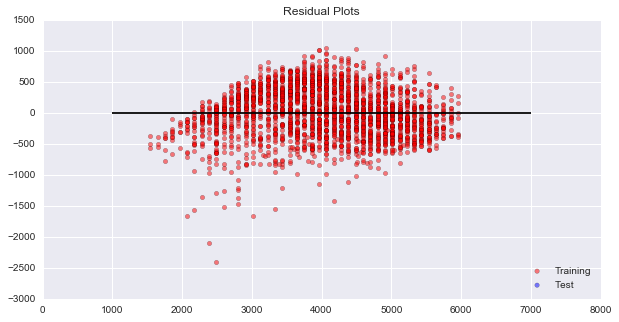

In [284]:
plt.figure(figsize=(10,5))
trainplot=plt.scatter(PredictedTrainLoad,(PredictedTrainLoad-ActualTrainLoad),c='r',alpha=0.5)
#testplot=plt.scatter(PredictedTestLoad,(PredictedTestLoad-ActualTestLoad),c='b',alpha=0.5)
plt.hlines(y=0,xmin=1000,xmax=7000)
plt.legend((trainplot,testplot),('Training','Test'),loc='lower right')
plt.title('Residual Plots')

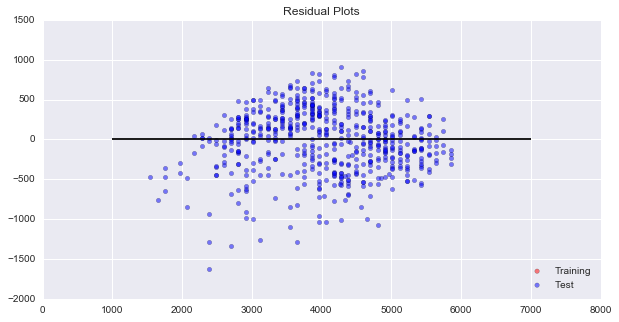

In [285]:
plt.figure(figsize=(10,5))
#trainplot=plt.scatter(PredictedTrainLoad,(PredictedTrainLoad-ActualTrainLoad),c='r',alpha=0.5)
testplot=plt.scatter(PredictedTestLoad,(PredictedTestLoad-ActualTestLoad),c='b',alpha=0.5)
plt.hlines(y=0,xmin=1000,xmax=7000)
plt.legend((trainplot,testplot),('Training','Test'),loc='lower right')
plt.title('Residual Plots')

#### *Mutivariate Linear Regression with Categorical Variables*

In [287]:
###temp_model=smf.ols(formula="train['Total Utility Load']~Temp",data=train)

## temp_model_fit=temp_model.fit()

multi_model=smf.ols(formula="train['Total Utility Load']~Temp+C(Hour)",data=train)

multiModelFit=multi_model.fit()

In [289]:
multiModelFit.params

Intercept         -3229.904032
C(Hour)[T.2.0]     -129.743977
C(Hour)[T.3.0]     -150.323816
C(Hour)[T.4.0]     -152.131956
C(Hour)[T.5.0]     -120.857256
C(Hour)[T.6.0]      -31.411219
C(Hour)[T.7.0]       23.151249
C(Hour)[T.8.0]       43.482486
C(Hour)[T.9.0]      103.978659
C(Hour)[T.10.0]     203.151449
C(Hour)[T.11.0]     356.753421
C(Hour)[T.12.0]     461.878865
C(Hour)[T.13.0]     590.645287
C(Hour)[T.14.0]     687.582443
C(Hour)[T.15.0]     796.372226
C(Hour)[T.16.0]     917.551806
C(Hour)[T.17.0]     993.115310
C(Hour)[T.18.0]    1000.062348
C(Hour)[T.19.0]     889.649361
C(Hour)[T.20.0]     879.256940
C(Hour)[T.21.0]     866.746523
C(Hour)[T.22.0]     683.806521
C(Hour)[T.23.0]     429.094566
C(Hour)[T.24.0]     142.535668
Temp                 73.255130
dtype: float64

In [290]:
multiModelFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     train['Total Utility Load']   R-squared:                       0.928
Model:                                     OLS   Adj. R-squared:                  0.928
Method:                          Least Squares   F-statistic:                     1251.
Date:                         Tue, 19 Apr 2016   Prob (F-statistic):               0.00
Time:                                 19:44:54   Log-Likelihood:                -16440.
No. Observations:                         2342   AIC:                         3.293e+04
Df Residuals:                             2317   BIC:                         3.307e+04
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -3229.9040     91.118    -35.447      0.000     -3408.586 -3051.222
C(Hour)[T.2.0]   -129.7440     37.857     -3.427      0.001      -203.981   -55.507
C(Hour)[T.3.0]   -150.3238     37.949     -3.961      0.000      -224.741   -75.906
C(Hour)[T.4.0]   -152.1320     38.456     -3.956      0.000      -227.544   -76.720
C(Hour)[T.5.0]   -120.8573     39.168     -3.086      0.002      -197.665   -44.049
C(Hour)[T.6.0]    -31.4112     39.428     -0.797      0.426      -108.728    45.906
C(Hour)[T.7.0]     23.1512     39.007      0.594      0.553       -53.342    99.644
C(Hour)[T.8.0]     43.4825     39.333      1.105      0.269       -33.649   120.614
C(Hour)[T.9.0]    103.9787     38.807      2.679      0.007        27.879   180.078
C(Hour)[T.10.0]   203.1514     39.103      5.195      0.000       126.470   279.833
C(Hour)[T.11.0]   356.7534     38.626      9.236      0.000       281.008   432.499
C(Hour)[T.12.0]   461.8789     38.818     11.899      0.000       385.758   538.000
C(Hour)[T.13.0]   590.6453     40.340     14.642      0.000       511.538   669.752
C(Hour)[T.14.0]   687.5824     40.570     16.948      0.000       608.026   767.139
C(Hour)[T.15.0]   796.3722     40.557     19.636      0.000       716.841   875.903
C(Hour)[T.16.0]   917.5518     40.841     22.467      0.000       837.464   997.640
C(Hour)[T.17.0]   993.1153     41.236     24.083      0.000       912.251  1073.979
C(Hour)[T.18.0]  1000.0623     40.342     24.790      0.000       920.952  1079.173
C(Hour)[T.19.0]   889.6494     39.205     22.692      0.000       812.768   966.530
C(Hour)[T.20.0]   879.2569     40.586     21.664      0.000       799.667   958.846
C(Hour)[T.21.0]   866.7465     38.410     22.566      0.000       791.426   942.067
C(Hour)[T.22.0]   683.8065     38.926     17.567      0.000       607.472   760.141
C(Hour)[T.23.0]   429.0946     38.186     11.237      0.000       354.212   503.977
C(Hour)[T.24.0]   142.5357     39.633      3.596      0.000        64.815   220.256
Temp               73.2551      0.975     75.132      0.000        71.343    75.167
==============================================================================
Omnibus:                       33.645   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.701
Skew:                           0.255   Prob(JB):                     1.07e-08
Kurtosis:                       3.340   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might

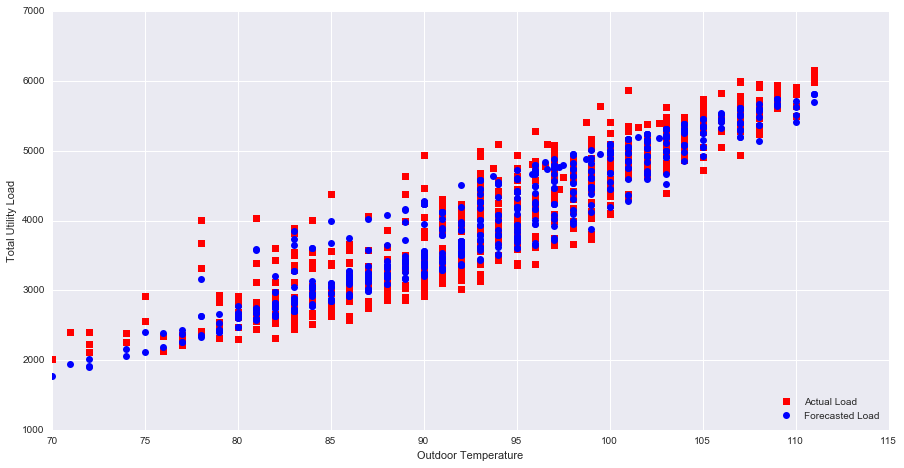

In [292]:
plt.figure(figsize=(15,7.5))
plt.plot(test['Temp'],test['Total Utility Load'],'rs',label='Actual Load')
plt.plot(test['Temp'],multiModelFit.predict(test),'bo',label='Forecasted Load')
plt.ylabel("Total Utility Load")
plt.xlabel("Outdoor Temperature")
plt.legend(loc=4)

In [293]:
PredictedTestLoad2=multiModelFit.predict(test)
r2_score(ActualTestLoad,PredictedTestLoad2)

0.93031666158666915

In [294]:
PredictedTrainLoad2=multiModelFit.predict(train)
r2_score(ActualTrainLoad,PredictedTrainLoad2)

0.92836192924923888

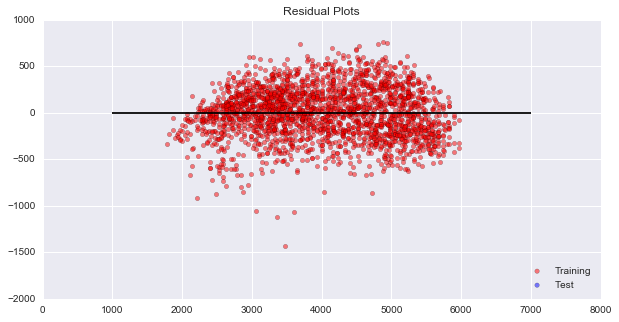

In [295]:
plt.figure(figsize=(10,5))
trainplot=plt.scatter(PredictedTrainLoad2,(PredictedTrainLoad2-ActualTrainLoad),c='r',alpha=0.5)
#testplot=plt.scatter(PredictedTestLoad,(PredictedTestLoad-ActualTestLoad),c='b',alpha=0.5)
plt.hlines(y=0,xmin=1000,xmax=7000)
plt.legend((trainplot,testplot),('Training','Test'),loc='lower right')
plt.title('Residual Plots')

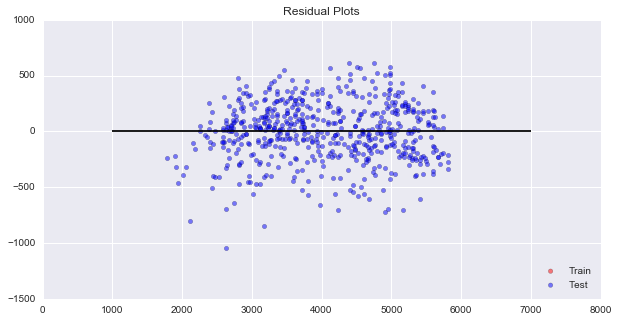

In [296]:
plt.figure(figsize=(10,5))
#trainplot=plt.scatter(PredictedTrainLoad,(PredictedTrainLoad-ActualTrainLoad),c='r',alpha=0.5)
testplot=plt.scatter(PredictedTestLoad2,(PredictedTestLoad2-ActualTestLoad),c='b',alpha=0.5)
plt.hlines(y=0,xmin=1000,xmax=7000)
plt.legend((trainplot,testplot),('Train','Test'),loc='lower right')
plt.title('Residual Plots')

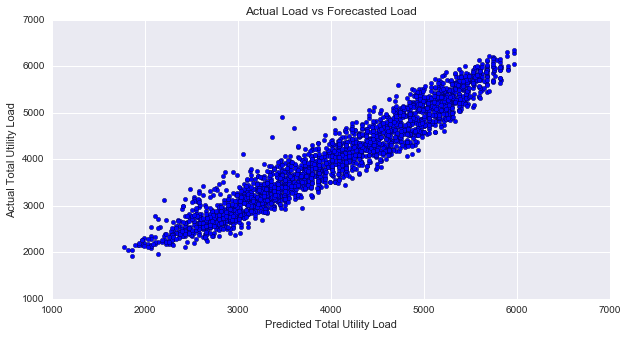

In [299]:
plt.figure(figsize=(10,5))
plt.scatter(PredictedTrainLoad2,ActualTrainLoad)
plt.title('Actual Load vs Forecasted Load')
plt.xlabel('Predicted Total Utility Load')
plt.ylabel('Actual Total Utility Load')